## Problem 1: Speed and Stopping Distances of Cars

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
car= pd.read_csv('Desktop/cars.csv')
car.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
speed,4,4,7,7,8,9,10,10,10,11,...,20,20,20,22,23,24,24,24,24,25
dist,2,10,4,22,16,10,18,26,34,17,...,52,56,64,66,54,70,92,93,120,85


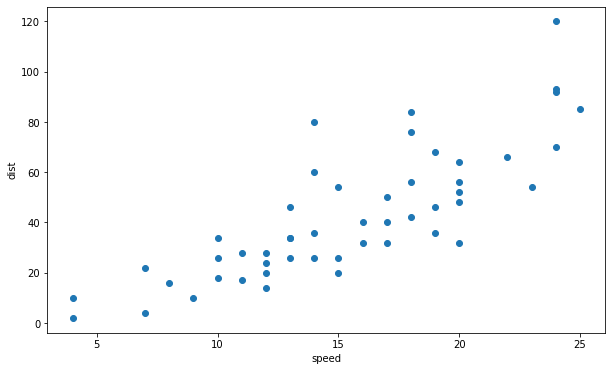

In [3]:
speed = car['speed']
dist = car['dist']
plt.figure(figsize=(10,6))
# plt.figure(dpi=150)
plt.scatter(speed, dist)
plt.xlabel('speed')
plt.ylabel('dist')
plt.show()

In [4]:
degree = [i for i in range(1,11)]
CV_error = []

for i in range(1,11):
    MSE = []
    Loo = LeaveOneOut()
    for train, test in Loo.split(speed):
        train_x, test_x, train_y, test_y = speed[train], speed[test], dist[train], dist[test]
        params = np.polyfit(train_x, train_y, i) 
        func = np.poly1d(params) 
        pred = func(test_x) 
        MSE.append(mean_squared_error(pred, test_y)) 
    CV_error.append(np.mean(MSE))
    
CV_error

[246.4054159527173,
 243.02917460014902,
 246.82877541816302,
 250.09144505300975,
 279.6864456868775,
 327.5013759079803,
 408.94790901856874,
 476.4365509666917,
 318.1917382445718,
 696.9015305800901]

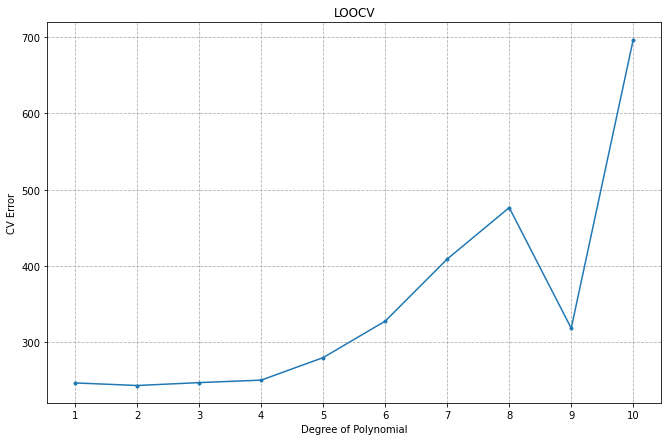

In [5]:
plt.figure(figsize=(11,7))
# plt.figure(dpi=170)
plt.plot(degree, CV_error, marker='.')
x_ticks = np.arange(1, 11, 1)
plt.xticks(x_ticks)
plt.grid(ls='--')
plt.xlabel('Degree of Polynomial')
plt.ylabel('CV Error')
plt.title('LOOCV')

# plt.savefig('LOOCV.png')
plt.show()

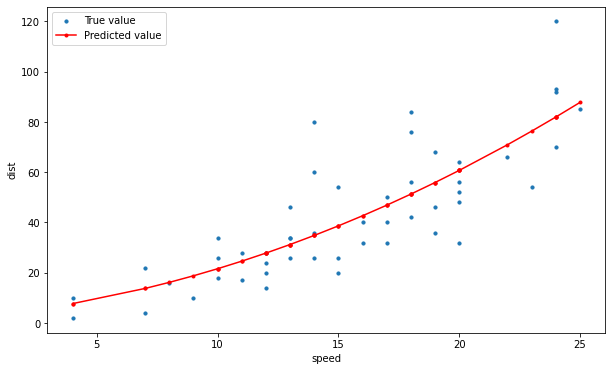

In [6]:
params_2 = np.polyfit(speed, dist, 2) 
func_2 = np.poly1d(params_2) 
pred_2 = func_2(speed) 

plt.figure(figsize=(10,6))
# plt.figure(dpi=200)
plt.scatter(speed, dist, s=10, label='True value')
plt.plot(speed, pred_2, marker='.', color='red', label='Predicted value')
plt.legend()
plt.xlabel('speed')
plt.ylabel('dist')

# plt.savefig('1.2.png')
plt.show()

In [7]:
degree = [i for i in range(1,11)]
CV_error_5 = []

for i in range(1,11):
    mse = []
    KF = KFold(n_splits=5, shuffle=True, random_state=7)
    for train, test in KF.split(speed):
        if i == 1 or i == 7: # random choose two to present
            print(test)
        train_x, test_x, train_y, test_y = speed[train], speed[test], dist[train], dist[test]
        params = np.polyfit(train_x, train_y, i) 
        func = np.poly1d(params) 
        pred = func(test_x) 
        mse.append(mean_squared_error(pred, test_y)) 
    CV_error_5.append(np.mean(mse))

[ 1 10 13 15 20 22 27 30 36 42]
[ 2  9 17 18 29 32 34 35 41 46]
[ 5  6 12 16 21 24 31 33 38 45]
[ 0  7  8 11 26 37 40 43 48 49]
[ 3  4 14 19 23 25 28 39 44 47]
[ 1 10 13 15 20 22 27 30 36 42]
[ 2  9 17 18 29 32 34 35 41 46]
[ 5  6 12 16 21 24 31 33 38 45]
[ 0  7  8 11 26 37 40 43 48 49]
[ 3  4 14 19 23 25 28 39 44 47]


In [8]:
 CV_error_5

[242.97840657698913,
 237.58857265413076,
 237.227207581957,
 236.81407774034656,
 264.45240444958125,
 286.30882479396575,
 411.79613968647527,
 402.0927732370481,
 556.2113155435263,
 2704.781436210341]

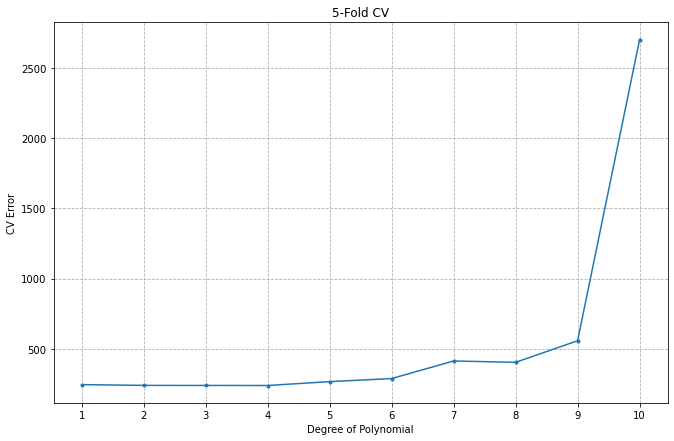

In [9]:
plt.figure(figsize=(11,7))
# plt.figure(dpi=170)
plt.plot(degree, CV_error_5, marker='.')
x_ticks = np.arange(1, 11, 1)
plt.xticks(x_ticks)
plt.grid(ls='--')
plt.xlabel('Degree of Polynomial')
plt.ylabel('CV Error')
plt.title('5-Fold CV')

# plt.savefig('5-Fold CV.png')
plt.show()

## Problem 2: Titanic – Survival or Not

### Load data

In [10]:
titanic = pd.read_csv('Desktop/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Deal with missing data

In [12]:
titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [13]:
train = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Survived']]
train

,Pclass,Sex,Age,SibSp,Fare,Survived
0,3,male,22.0,1,7.2500,0
1,1,female,38.0,1,71.2833,1
2,3,female,26.0,0,7.9250,1
3,1,female,35.0,1,53.1000,1
4,3,male,35.0,0,8.0500,0
...,...,...,...,...,...,...
886,2,male,27.0,0,13.0000,0
887,1,female,19.0,0,30.0000,1
888,3,female,NaN,1,23.4500,0
889,1,male,26.0,0,30.0000,1


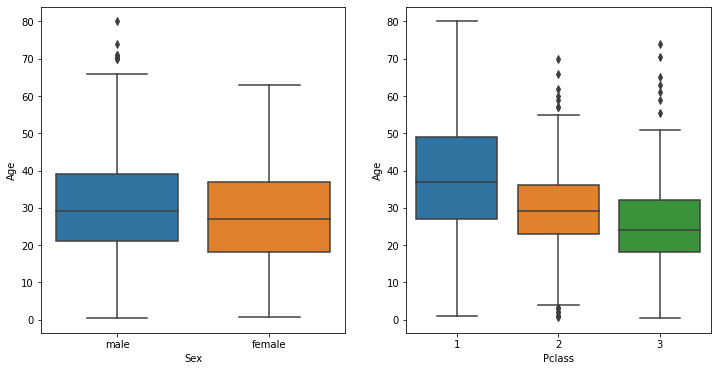

In [14]:
plt.figure(figsize = (12,6))

plt.subplot(1, 2, 1)
sns.boxplot(x=train['Sex'], y=train['Age'])
plt.subplot(1, 2, 2)
sns.boxplot(x=train['Pclass'], y=train['Age'])

plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

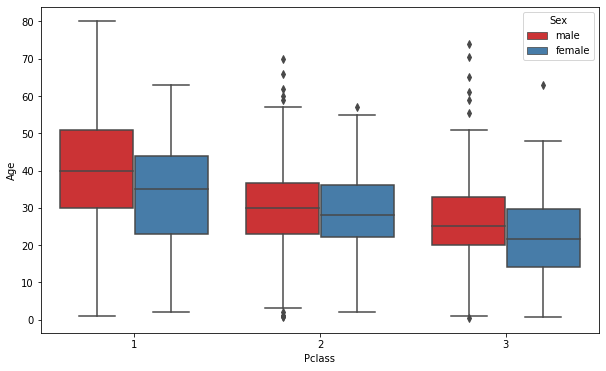

In [15]:
plt.figure(figsize = (10,6))
# plt.figure(dpi=170)
sns.boxplot(x="Pclass", y="Age", hue="Sex", data=train, palette="Set1")
# plt.savefig('2.1.png')

In [16]:
Avg_ages = train.groupby(['Sex','Pclass'])['Age'].mean().round()
Avg_ages

Sex     Pclass
female  1         35.0
        2         29.0
        3         22.0
male    1         41.0
        2         31.0
        3         27.0
Name: Age, dtype: float64

In [17]:
for (i,j) in Avg_ages.index:
    value = Avg_ages.loc[i,j]
    train.loc[(train.Sex==i) & (train.Pclass==j) & (train.Age.isnull()), ['Age']] = value

In [18]:
train.isnull().sum().sort_values(ascending=False)

Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
Survived    0
dtype: int64

### Set dummy variables

In [19]:
train['Pclass'] = train['Pclass'].astype(str)
X_cate = train[['Pclass','Sex']]
X_cate = pd.get_dummies(X_cate) 
X_cate

/var/folders/5l/65gy2bfn02nb0vpqljgn6ly00000gn/T/ipykernel_27344/94585246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Pclass'] = train['Pclass'].astype(str)


,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,0,1,0,1
1,1,0,0,1,0
2,0,0,1,1,0
3,1,0,0,1,0
4,0,0,1,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,1,0
888,0,0,1,1,0
889,1,0,0,0,1


In [20]:
X_num = train[['Age', 'Fare', 'SibSp']]
X = pd.concat([X_num, X_cate], axis=1)
Y = train[['Survived']]
X

,Age,Fare,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,7.2500,1,0,0,1,0,1
1,38.0,71.2833,1,1,0,0,1,0
2,26.0,7.9250,0,0,0,1,1,0
3,35.0,53.1000,1,1,0,0,1,0
4,35.0,8.0500,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0,1,0,0,1
887,19.0,30.0000,0,1,0,0,1,0
888,22.0,23.4500,1,0,0,1,1,0
889,26.0,30.0000,0,1,0,0,0,1


### Logisti regression

In [21]:
X_train = sm.add_constant(X)
logistic = sm.GLM(Y, X_train, family=sm.families.Binomial())
logistic_res = logistic.fit(use_t=True)
logistic_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.13
Date:                Wed, 19 Oct 2022   Deviance:                       784.26
Time:                        21:39:26   Pearson chi2:                     937.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3634
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8525      0.166      5.145      0.000       0.527       1.178
Age           -0.0446      0.008     -5.445      0.000      -0.061      -0.029
Fare           0.0021      0.002      0.920      0.358      -0.002       0.007
SibSp         -0.3972      0.107     -3.724      0.000      -0.607      -0.188
Pclass_1       1.4819      0.221      6.713      0.000       1.049       1.915
Pclass_2       0.2945      0.149      1.971      0.049       0.001       0.588
Pclass_3      -0.9239      0.127     -7.294      0.000      -1.173      -0.675
Sex_female     1.7704      0.140     12.626      0.000       1.495       2.046
Sex_male      -0.9180      0.115     -8.015      0.000      -1.143      -0.693
==============================================================================
"""

In [22]:
# X_train = X_train.drop(columns=['Sex_female', 'Pclass_1'])
# logistic = sm.GLM(Y, X_train, family=sm.families.Binomial())
# logistic_res = logistic.fit(use_t=True)
# logistic_res.summary()

### Bootstrape and Logistic regression

In [23]:
train_new = pd.concat([X_train, Y], axis=1)
train_new

,const,Age,Fare,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Survived
0,1.0,22.0,7.2500,1,0,0,1,0,1,0
1,1.0,38.0,71.2833,1,1,0,0,1,0,1
2,1.0,26.0,7.9250,0,0,0,1,1,0,1
3,1.0,35.0,53.1000,1,1,0,0,1,0,1
4,1.0,35.0,8.0500,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,1.0,27.0,13.0000,0,0,1,0,0,1,0
887,1.0,19.0,30.0000,0,1,0,0,1,0,1
888,1.0,22.0,23.4500,1,0,0,1,1,0,0
889,1.0,26.0,30.0000,0,1,0,0,0,1,1


In [24]:
np.random.seed(77)
train_bootstrape = train_new.sample(n=1000, replace=True)
train_bootstrape

,const,Age,Fare,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Survived
727,1.0,22.0,7.7375,0,0,0,1,1,0,1
607,1.0,27.0,30.5000,0,1,0,0,0,1,1
596,1.0,29.0,33.0000,0,0,1,0,1,0,1
235,1.0,22.0,7.5500,0,0,0,1,1,0,0
293,1.0,24.0,8.8500,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
164,1.0,1.0,39.6875,4,0,0,1,0,1,0
94,1.0,59.0,7.2500,0,0,0,1,0,1,0
687,1.0,19.0,10.1708,0,0,0,1,0,1,0
711,1.0,41.0,26.5500,0,1,0,0,0,1,0


In [25]:
X_boot = train_bootstrape.drop(columns=['Survived'])
Y_boot = train_bootstrape[['Survived']]

In [26]:
logistic_bs = sm.GLM(Y_boot, X_boot, family=sm.families.Binomial())
logistic_1 = logistic_bs.fit(use_t=True)
logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      993
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -474.18
Date:                Wed, 19 Oct 2022   Deviance:                       948.37
Time:                        21:39:27   Pearson chi2:                 1.09e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3297
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9513      0.152      6.271      0.000       0.654       1.249
Age           -0.0469      0.007     -6.355      0.000      -0.061      -0.032
Fare           0.0018      0.002      1.055      0.292      -0.002       0.005
SibSp         -0.3819      0.101     -3.790      0.000      -0.580      -0.184
Pclass_1       1.3051      0.189      6.913      0.000       0.935       1.676
Pclass_2       0.4930      0.148      3.322      0.001       0.202       0.784
Pclass_3      -0.8468      0.110     -7.698      0.000      -1.063      -0.631
Sex_female     1.6608      0.128     13.013      0.000       1.410       1.911
Sex_male      -0.7095      0.102     -6.960      0.000      -0.909      -0.509
==============================================================================
"""

### EDA on original data

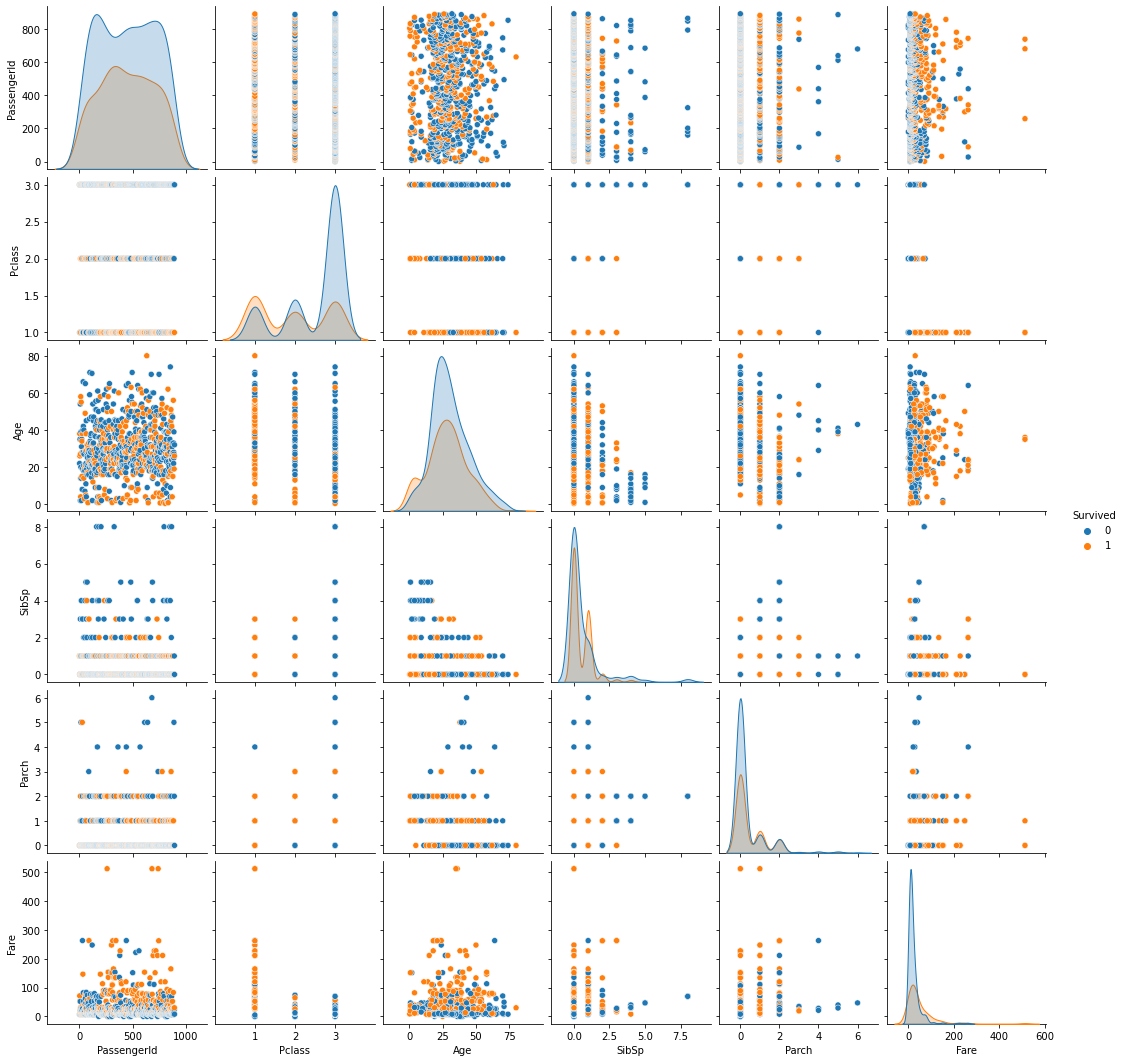

In [27]:
sns.pairplot(titanic, hue = "Survived")

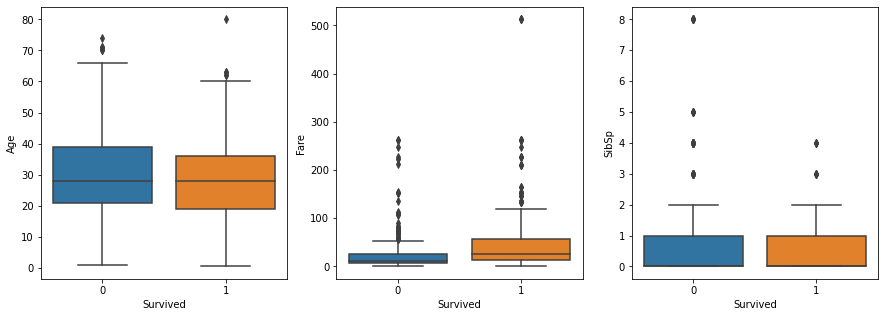

In [28]:
fig = plt.figure(figsize = (15,5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.subplot(1, 3, 2)
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.subplot(1, 3, 3)
sns.boxplot(x='Survived', y='SibSp', data=titanic)

plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

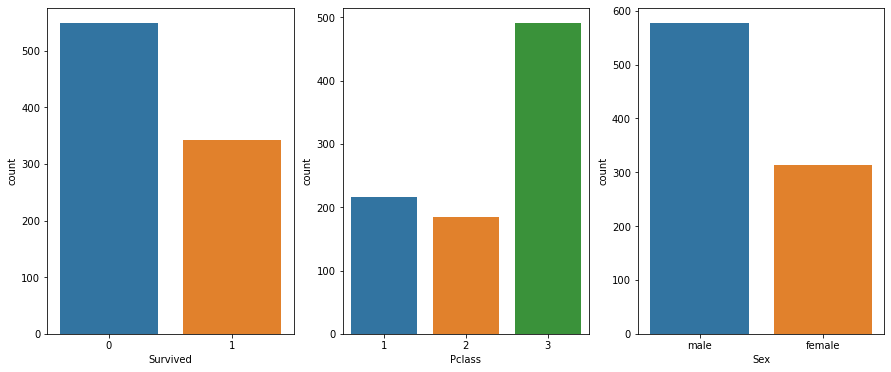

In [29]:
fig = plt.figure(figsize = (15,6))

plt.subplot(1, 3, 1)
sns.countplot(x = 'Survived', data = titanic)

plt.subplot(1, 3, 2)
sns.countplot(x = 'Pclass', data=titanic)

plt.subplot(1, 3, 3)
sns.countplot(x = 'Sex', data = titanic)

<AxesSubplot:xlabel='Sex', ylabel='count'>

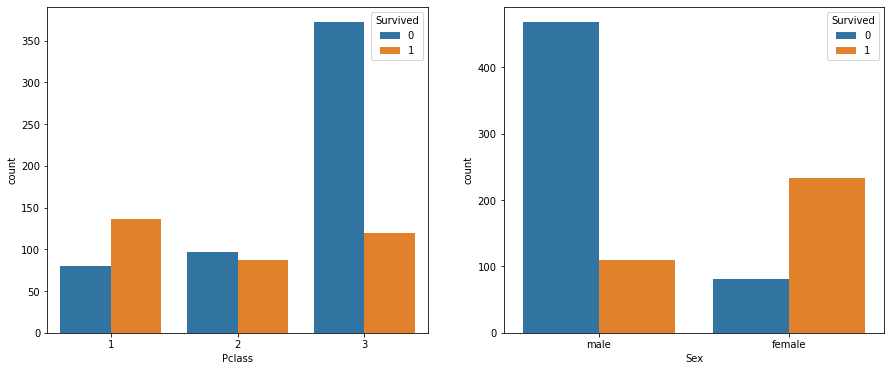

In [30]:
fig = plt.figure(figsize = (15,6))

plt.subplot(1, 2, 1)
sns.countplot(x = 'Pclass', data=titanic, hue = 'Survived')

plt.subplot(1, 2, 2)
sns.countplot(x = 'Sex', data = titanic, hue = 'Survived')

In [31]:
titanic["Survived"].value_counts(normalize = False)

0    549
1    342
Name: Survived, dtype: int64

In [32]:
titanic["Pclass"].value_counts(normalize = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [33]:
titanic["Sex"].value_counts(normalize = False)

male      577
female    314
Name: Sex, dtype: int64

In [34]:
survived_female = (titanic["Sex"] == "female") & (titanic["Survived"] == 1)
survived_male = (titanic["Sex"] == "male") & (titanic["Survived"] == 1)
survived_female.value_counts(), survived_male.value_counts()

(False    658
 True     233
 dtype: int64,
 False    782
 True     109
 dtype: int64)

In [35]:
survived_female1 = (titanic["Sex"] == "female") & (titanic["Survived"] == 1) & (titanic["Pclass"] == 1)
survived_female2 = (titanic["Sex"] == "female") & (titanic["Survived"] == 1) & (titanic["Pclass"] == 2)
survived_female3 = (titanic["Sex"] == "female") & (titanic["Survived"] == 1) & (titanic["Pclass"] == 3)
survived_female1.value_counts(), survived_female2.value_counts(), survived_female3.value_counts()

(False    800
 True      91
 dtype: int64,
 False    821
 True      70
 dtype: int64,
 False    819
 True      72
 dtype: int64)

In [36]:
survived_male1 = (titanic["Sex"] == "male") & (titanic["Survived"] == 1) & (titanic["Pclass"] == 1)
survived_male2 = (titanic["Sex"] == "male") & (titanic["Survived"] == 1) & (titanic["Pclass"] == 2)
survived_male3 = (titanic["Sex"] == "male") & (titanic["Survived"] == 1) & (titanic["Pclass"] == 3)
survived_male1.value_counts(), survived_male2.value_counts(), survived_male3.value_counts()

(False    846
 True      45
 dtype: int64,
 False    874
 True      17
 dtype: int64,
 False    844
 True      47
 dtype: int64)

Total amount of survived: 342

female: 233
Pclass 1: 91 
Pclass 2: 70
Pclass 3: 72

male: 109
Pclass 1: 45
Pclass 2: 17
Pclass 3: 47

## Problem 3(Use R)

In [37]:
GPA = pd.read_csv('Desktop/FirstYearGPA.csv')
GPA

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1
...,...,...,...,...,...,...,...,...,...,...
214,3.13,3.41,700,690,1,10.0,19.0,0,1,1
215,2.88,3.58,680,740,0,20.0,3.0,0,0,1
216,2.65,3.15,590,750,1,8.5,8.5,0,1,1
217,2.97,3.09,670,630,0,12.0,4.0,0,1,1


## Problem 4(Use R)

In [38]:
train = pd.read_csv('Desktop/diabetes_train.csv')
test = pd.read_csv('Desktop/diabetes_test.csv')
train.describe()

,Y,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,...,ldl.hdl,ldl.tch,ldl.ltg,ldl.glu,hdl.tch,hdl.ltg,hdl.glu,tch.ltg,tch.glu,ltg.glu
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,...,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,152.888889,-0.000469,-0.001162,0.001707,-0.000788,-0.000937,-0.001287,-0.000610,-0.000039,0.001184,...,-0.001224,0.000418,0.000653,0.001637,-0.000741,-0.000430,-0.001932,0.000956,0.001995,0.001117
std,77.818870,0.048036,0.047547,0.048530,0.048235,0.047148,0.047181,0.046888,0.048489,0.047438,...,0.049665,0.049045,0.046840,0.048373,0.048688,0.047129,0.050107,0.047766,0.050423,0.048938
min,25.000000,-0.107226,-0.044642,-0.090275,-0.112400,-0.126781,-0.115613,-0.102307,-0.076395,-0.096433,...,-0.256471,-0.111508,-0.172107,-0.151734,-0.234890,-0.254685,-0.223255,-0.160745,-0.128919,-0.088765
25%,88.000000,-0.038207,-0.044642,-0.033151,-0.036656,-0.033216,-0.032629,-0.035117,-0.039493,-0.033249,...,-0.015031,-0.023565,-0.019428,-0.020710,-0.015622,-0.018983,-0.018023,-0.027146,-0.020614,-0.023679
50%,139.500000,0.005383,-0.044642,-0.005128,-0.005671,-0.005697,-0.005072,-0.006584,-0.002592,-0.001948,...,0.005824,-0.014089,-0.007736,-0.008940,0.017148,0.007713,0.008211,-0.012856,-0.015758,-0.012906
75%,211.500000,0.038076,0.050680,0.034481,0.032201,0.025950,0.027887,0.026550,0.034309,0.033657,...,0.019836,0.010346,0.022869,0.012934,0.031304,0.022685,0.022393,0.016651,0.020873,0.013847
max,346.000000,0.110727,0.050680,0.170555,0.132044,0.152538,0.198788,0.181179,0.185234,0.133599,...,0.160773,0.555129,0.203381,0.299032,0.080445,0.163067,0.209905,0.375845,0.318104,0.338184


In [39]:
train.columns

Index(['Y', 'age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg',
       'glu', 'age.1', 'sex.1', 'bmi.1', 'map.1', 'tc.1', 'ldl.1', 'hdl.1',
       'tch.1', 'ltg.1', 'glu.1', 'age.2', 'bmi.2', 'map.2', 'tc.2', 'ldl.2',
       'hdl.2', 'tch.2', 'ltg.2', 'glu.2', 'age.sex', 'age.bmi', 'age.map',
       'age.tc', 'age.ldl', 'age.hdl', 'age.tch', 'age.ltg', 'age.glu',
       'sex.bmi', 'sex.map', 'sex.tc', 'sex.ldl', 'sex.hdl', 'sex.tch',
       'sex.ltg', 'sex.glu', 'bmi.map', 'bmi.tc', 'bmi.ldl', 'bmi.hdl',
       'bmi.tch', 'bmi.ltg', 'bmi.glu', 'map.tc', 'map.ldl', 'map.hdl',
       'map.tch', 'map.ltg', 'map.glu', 'tc.ldl', 'tc.hdl', 'tc.tch', 'tc.ltg',
       'tc.glu', 'ldl.hdl', 'ldl.tch', 'ldl.ltg', 'ldl.glu', 'hdl.tch',
       'hdl.ltg', 'hdl.glu', 'tch.ltg', 'tch.glu', 'ltg.glu'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


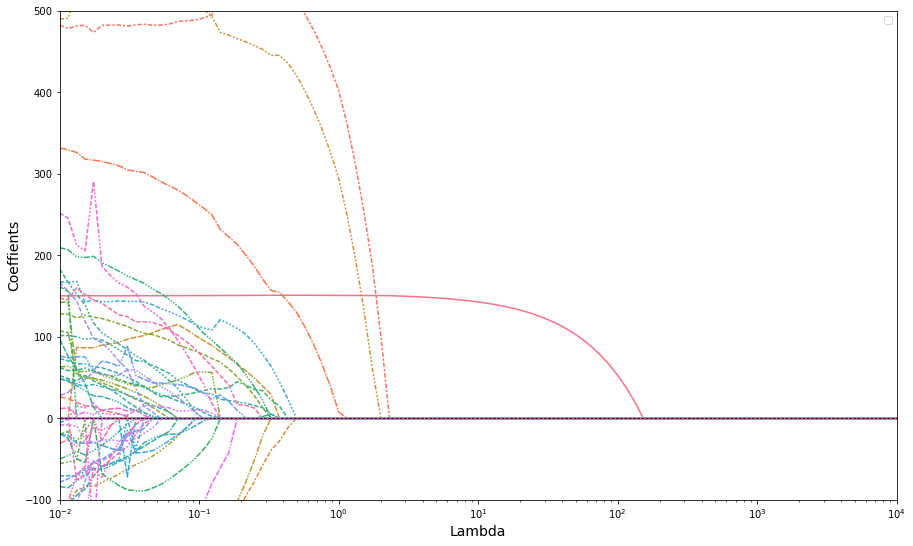

In [40]:
lam=10**np.linspace(-2,4,100)
intercept_dict = {}

x = train.drop(columns=['Y'])
X = sm.add_constant(x)
Y2 = train[['Y']]
model2 = sm.OLS(Y2, X)

for a in lam:
    estimation = model2.fit_regularized(L1_wt=1,alpha=a)
    intercept_dict[a]=estimation.params 
    
params_rr = pd.DataFrame(intercept_dict).T
params_rr.columns = X.columns

plt.figure(figsize = (15,9))


sns.lineplot(data = params_rr,dashes=True, legend=None)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.8,color = 'black')
plt.xticks(lam)

plt.xscale('log')
plt.ylim(-100,500)
plt.xlim(10**(-2),10**4)
plt.ylabel('Coeffients',size=14)
plt.xlabel('Lambda',size=14)
plt.legend()
plt.show()